In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('/content/train - train.csv')
test_df = pd.read_csv('/content/test - test.csv')

# **Data Preparing**



## **Exploring dataset**

In [ ]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

We can see that there are multiple columns that have nulls, we need to handle them


---


Nulls are in these columns:
* fc - Front Camera megapixels
* four_g - Has 4G or not
* int_memory - Internal Memory in Gigabytes
* m_dep - Mobile Depth in cm
* mobile_wt - Weight of mobile phone
* n_cores - Number of cores of the processor
* pc - Primary Camera megapixels
* px_height - Pixel Resolution Height
* px_width - Pixel Resolution Width
* ram - Random Access Memory in Megabytes
* sc_h - Screen Height of mobile in cm
* sc_w - Screen Width of mobile in cm






## **Data Cleaning**

In [ ]:
train_df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
min_values = train_df.min()
print(min_values)

battery_power    501.0
blue               0.0
clock_speed        0.5
dual_sim           0.0
fc                 0.0
four_g             0.0
int_memory         2.0
m_dep              0.1
mobile_wt         80.0
n_cores            1.0
pc                 0.0
px_height          0.0
px_width         500.0
ram              256.0
sc_h               5.0
sc_w               0.0
talk_time          2.0
three_g            0.0
touch_screen       0.0
wifi               0.0
price_range        0.0
dtype: float64


We can see that ther is zero value in min values a lot of columns, and we should solve it becaues its not right (In categorical columns it's alright).A device characteristic cant be zero (e.g: Device pixels hight cant be zero)

In [ ]:
#Dropping zero values from continuous values columns

for i in ['fc','px_height','sc_w','pc']:
  train_df = train_df.drop(train_df[train_df[i]==0.].index)

#Checking after dropping
train_df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1395.000000,1395.000000,1395.000000,1395.000000,1392.000000,1392.000000,1392.000000,1392.000000,1393.000000,1393.000000,...,1391.000000,1393.000000,1393.000000,1394.000000,1394.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000
mean,1241.344803,0.498925,1.514480,0.496774,5.642241,0.513649,32.040230,0.506322,141.188083,4.497487,...,641.624012,1251.195262,2151.118449,12.501435,6.349354,11.011470,0.750538,0.500358,0.511828,1.526165
std,443.437113,0.500178,0.816046,0.500169,4.163433,0.499993,18.236637,0.289431,35.577388,2.302273,...,445.573223,432.678012,1087.554204,4.169979,4.129357,5.436461,0.432857,0.500179,0.500039,1.124207
min,501.000000,0.000000,0.500000,0.000000,1.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,1.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,849.000000,0.000000,0.700000,0.000000,2.000000,0.000000,16.000000,0.200000,110.000000,2.000000,...,275.000000,876.000000,1206.000000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1234.000000,0.000000,1.500000,0.000000,5.000000,1.000000,32.000000,0.500000,143.000000,4.000000,...,552.000000,1256.000000,2195.000000,13.000000,6.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1624.500000,1.000000,2.200000,1.000000,8.000000,1.000000,48.000000,0.800000,172.000000,7.000000,...,946.500000,1629.000000,3104.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1949.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1395 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1395 non-null   int64  
 1   blue           1395 non-null   int64  
 2   clock_speed    1395 non-null   float64
 3   dual_sim       1395 non-null   int64  
 4   fc             1392 non-null   float64
 5   four_g         1392 non-null   float64
 6   int_memory     1392 non-null   float64
 7   m_dep          1392 non-null   float64
 8   mobile_wt      1393 non-null   float64
 9   n_cores        1393 non-null   float64
 10  pc             1392 non-null   float64
 11  px_height      1391 non-null   float64
 12  px_width       1393 non-null   float64
 13  ram            1393 non-null   float64
 14  sc_h           1394 non-null   float64
 15  sc_w           1394 non-null   float64
 16  talk_time      1395 non-null   int64  
 17  three_g        1395 non-null   int64  
 18  touch_screen 

We deleted unwanted zero values. let's check

In [ ]:
min_values = train_df.min()
print(min_values)

battery_power    501.0
blue               0.0
clock_speed        0.5
dual_sim           0.0
fc                 1.0
four_g             0.0
int_memory         2.0
m_dep              0.1
mobile_wt         80.0
n_cores            1.0
pc                 2.0
px_height          1.0
px_width         500.0
ram              256.0
sc_h               5.0
sc_w               1.0
talk_time          2.0
three_g            0.0
touch_screen       0.0
wifi               0.0
price_range        0.0
dtype: float64


We solve it!!

## **Handeling nulls**

In [ ]:
train_df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,3
four_g,3
int_memory,3
m_dep,3
mobile_wt,2
n_cores,2


We will handel null values in different ways

* Front Camera megapixels (fc) & Primary Camera megapixels (pc) are often related so we will fill nulls on **fc** based on counter mean values of **pc** and vice versa

* Same thing goes with Internal Memory in Gigabytes (int_memory) & Random Access Memory in Megabytes (ram), also for Pixel Resolution Height (px_height) & Pixel Resolution Width (px_width)

*  We fill Number of cores of the processor (n_cores) & Has 4G or not( four_g) with most frequent value since they're categorical columns

* We fill  Mobile Depth in cm (m_dep) & Weight of mobile phone (mobile_wt) with mean value as they're continuous  columns




In [ ]:
null_df = train_df[train_df['fc'].isnull()]
print(null_df[['fc','pc']])

     fc    pc
261 NaN   NaN
276 NaN  13.0
371 NaN  18.0


In [ ]:
train_df.groupby('fc')['pc'].mean()

,pc
fc,
1.0,7.300885
2.0,8.514451
3.0,9.711538
4.0,10.549180
5.0,11.376000
6.0,11.570000
7.0,12.662921
8.0,13.633803
9.0,14.855072


In [ ]:
train_df.groupby('pc')['fc'].mean()

,fc
pc,
2.0,1.000000
3.0,1.491803
4.0,2.158730
5.0,2.687500
6.0,3.082192
7.0,3.779070
8.0,3.772152
9.0,4.164706
10.0,4.958333


In [ ]:
null_df = train_df[train_df['pc'].isnull()]
print(null_df[['pc','fc']])

     pc   fc
261 NaN  NaN
292 NaN  6.0
293 NaN  6.0


In [ ]:
# Fill column_1 with the specified value where the condition is True and column_1 is null
train_df.loc[(train_df['pc'] == 13.0)  & train_df['fc'].isnull(), 'fc'] = 8.0
train_df.loc[(train_df['pc'] == 18.0)  & train_df['fc'].isnull(), 'fc'] = 16.0

train_df.loc[(train_df['fc'] == 6.0)  & train_df['pc'].isnull(), 'pc'] = 12.0

In [ ]:
print(train_df[['int_memory','ram']].corr())
train_df[['int_memory','ram']].head()

            int_memory       ram
int_memory    1.000000  0.045135
ram           0.045135  1.000000


,int_memory,ram
0,7.0,2549.0
2,41.0,2603.0
4,44.0,1411.0
5,22.0,1067.0
6,10.0,3220.0


In [ ]:
null_df = train_df[train_df['int_memory'].isnull()]
print(null_df[['int_memory','ram']])

     int_memory     ram
261         NaN     NaN
276         NaN  3760.0
371         NaN  2261.0


In [ ]:
train_df.groupby('int_memory')['ram'].mean()

,ram
int_memory,
2.0,2145.107143
3.0,1654.736842
4.0,1661.600000
5.0,2106.652174
6.0,2463.548387
...,...
60.0,1788.166667
61.0,2535.947368
62.0,2229.529412


In [ ]:
null_df = train_df[train_df['ram'].isnull()]
print(null_df[['ram','int_memory']])

     ram  int_memory
261  NaN         NaN
341  NaN         2.0


In [ ]:
train_df.groupby('ram')['int_memory'].min()

,int_memory
ram,
256.0,59.0
258.0,4.0
259.0,20.0
263.0,19.0
267.0,27.0
...,...
3971.0,57.0
3978.0,50.0
3991.0,22.0


In [ ]:
train_df.loc[(train_df['ram'] == 3760.0)  & train_df['int_memory'].isnull(), 'int_memory'] = 60.0
train_df.loc[(train_df['ram'] == 2261.0)  & train_df['int_memory'].isnull(), 'int_memory'] = 62.0
train_df.loc[(train_df['int_memory'] == 2.0)  & train_df['ram'].isnull(), 'int_memory'] = 2145.0

In [ ]:
most_frequent_value = train_df['n_cores'].mode()[0]
train_df['n_cores'] = train_df['n_cores'].fillna(most_frequent_value)

In [ ]:
most_frequent_value = train_df['four_g'].mode()[0]
train_df['four_g'] = train_df['four_g'].fillna(most_frequent_value)

In [ ]:
mean_value = train_df['m_dep'].mode()[0]
train_df['m_dep'] = train_df['m_dep'].fillna(mean_value)

In [ ]:
mean_value = train_df['mobile_wt'].mode()[0]
train_df['mobile_wt']= train_df['mobile_wt'].fillna(mean_value)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1395 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1395 non-null   int64  
 1   blue           1395 non-null   int64  
 2   clock_speed    1395 non-null   float64
 3   dual_sim       1395 non-null   int64  
 4   fc             1394 non-null   float64
 5   four_g         1395 non-null   float64
 6   int_memory     1394 non-null   float64
 7   m_dep          1395 non-null   float64
 8   mobile_wt      1395 non-null   float64
 9   n_cores        1395 non-null   float64
 10  pc             1394 non-null   float64
 11  px_height      1391 non-null   float64
 12  px_width       1393 non-null   float64
 13  ram            1393 non-null   float64
 14  sc_h           1394 non-null   float64
 15  sc_w           1394 non-null   float64
 16  talk_time      1395 non-null   int64  
 17  three_g        1395 non-null   int64  
 18  touch_screen 

In [ ]:
null_df = train_df[train_df['px_height'].isnull()]
print(null_df[['px_height','px_width']])

     px_height  px_width
261        NaN       NaN
292        NaN    1963.0
293        NaN    1489.0
341        NaN       NaN


In [ ]:
train_df.groupby('px_height')['px_width'].mean()

,px_width
px_height,
1.0,926.0
2.0,660.0
3.0,1145.5
4.0,743.0
7.0,1294.0
...,...
1899.0,1904.0
1901.0,1920.0
1914.0,1928.0


In [ ]:
train_df.loc[(train_df['px_width'] == 1963.0)  & train_df['px_height'].isnull(), 'px_height'] = 1920.0
train_df.loc[(train_df['px_width'] == 1489.0)  & train_df['px_height'].isnull(), 'px_height'] = 31.0

In [ ]:
train_df.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,1
four_g,0
int_memory,1
m_dep,0
mobile_wt,0
n_cores,0


The remaining null are very few and there are no counter values to count on to fill them. we can drop them or dill them with mean/most frequent.


---


I decided to drop them

In [ ]:
train_df = train_df.dropna()

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1393 non-null   int64  
 1   blue           1393 non-null   int64  
 2   clock_speed    1393 non-null   float64
 3   dual_sim       1393 non-null   int64  
 4   fc             1393 non-null   float64
 5   four_g         1393 non-null   float64
 6   int_memory     1393 non-null   float64
 7   m_dep          1393 non-null   float64
 8   mobile_wt      1393 non-null   float64
 9   n_cores        1393 non-null   float64
 10  pc             1393 non-null   float64
 11  px_height      1393 non-null   float64
 12  px_width       1393 non-null   float64
 13  ram            1393 non-null   float64
 14  sc_h           1393 non-null   float64
 15  sc_w           1393 non-null   float64
 16  talk_time      1393 non-null   int64  
 17  three_g        1393 non-null   int64  
 18  touch_screen 

##**EDA & Visulization**

In [ ]:
train_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

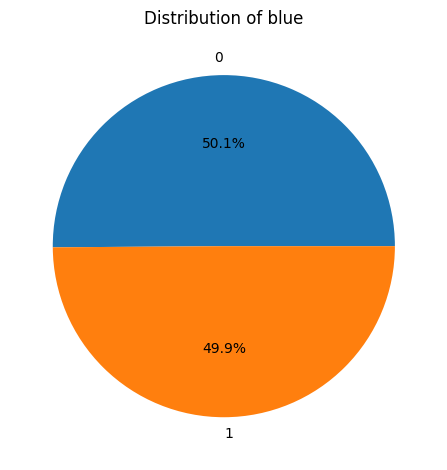

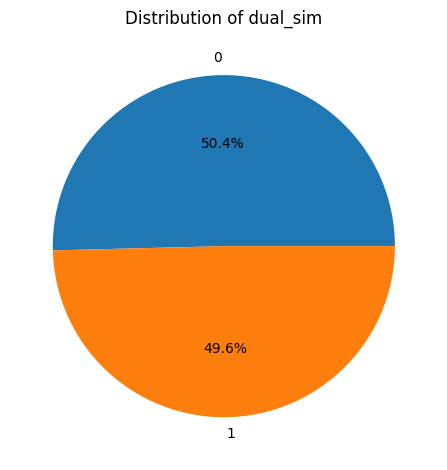

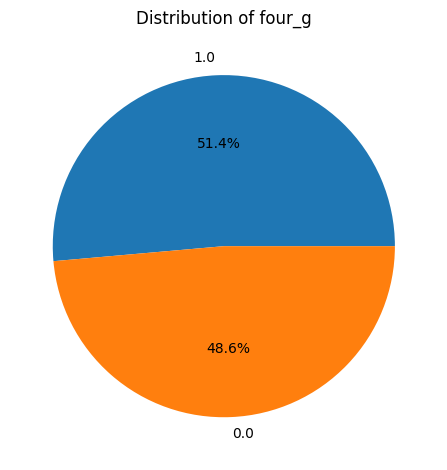

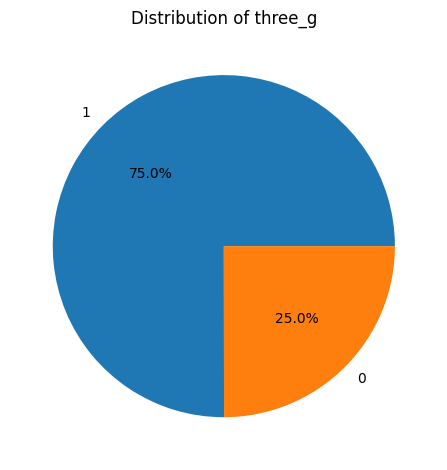

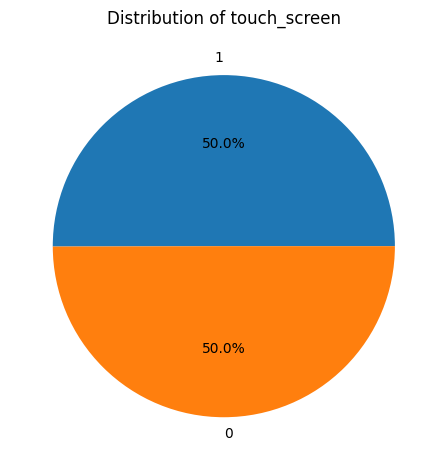

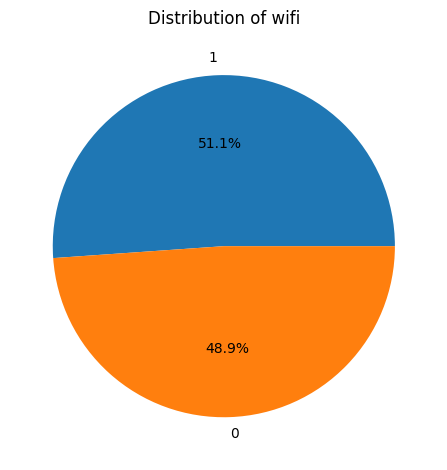

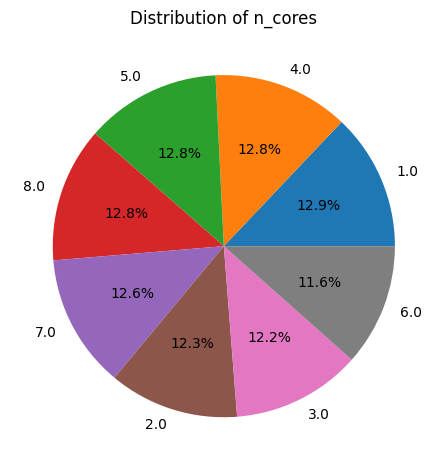

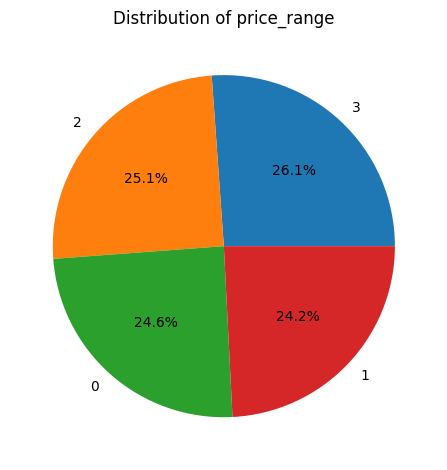

In [ ]:
for i in ['blue','dual_sim','four_g','three_g','touch_screen','wifi','n_cores','price_range']:
  value_counts = train_df[i].value_counts()
  plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
  plt.title(f'Distribution of {i}')
  plt.tight_layout()
  plt.show()

We can see that caterogical columns are balanced so there is no bias to be afraid of

In [ ]:
train_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

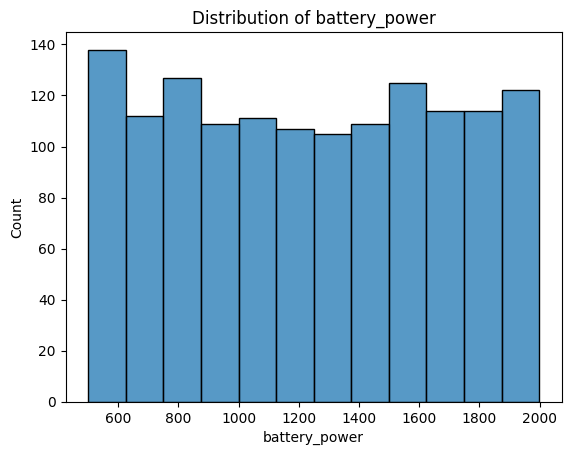

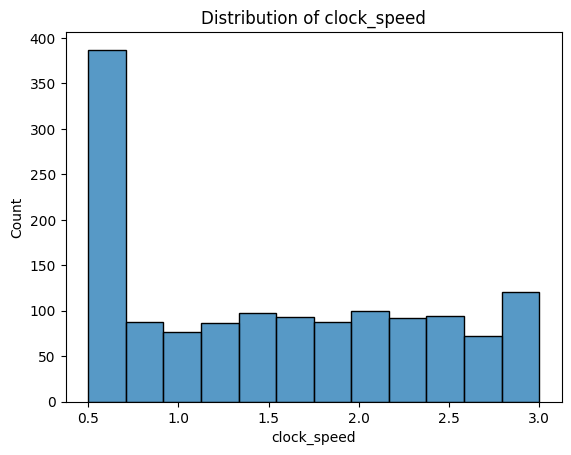

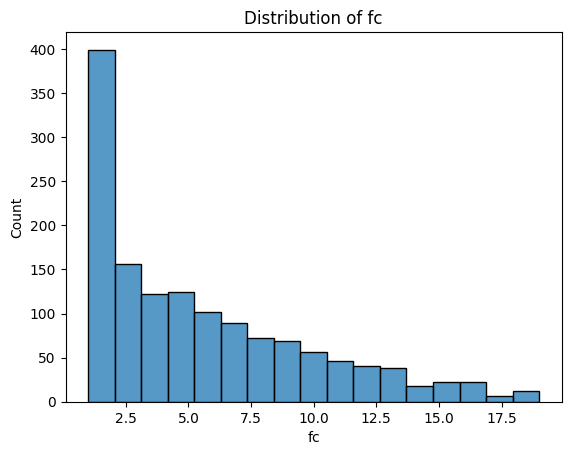

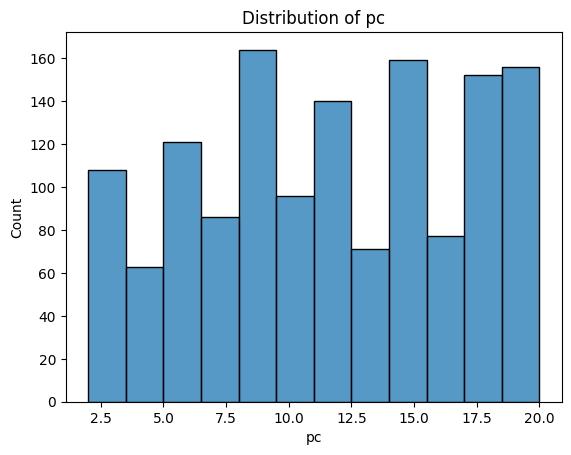

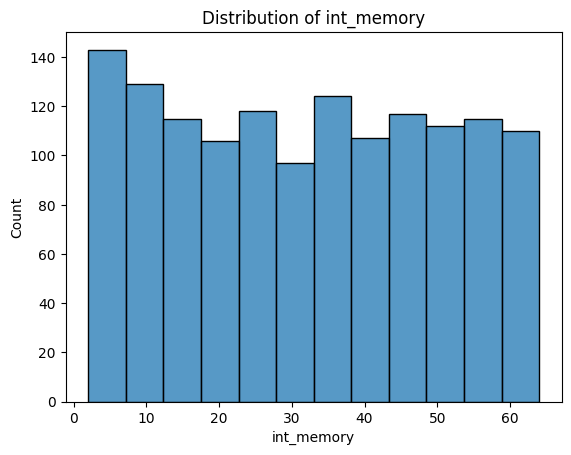

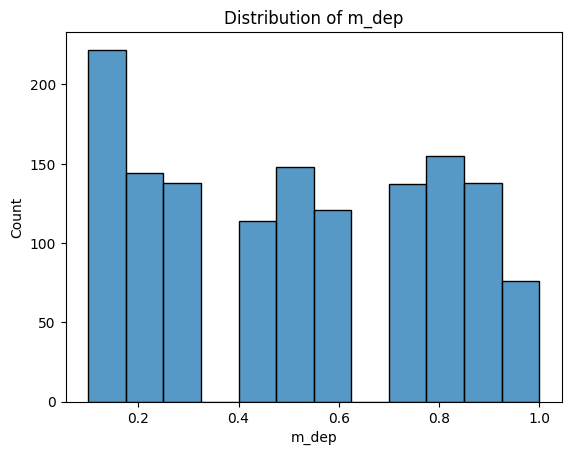

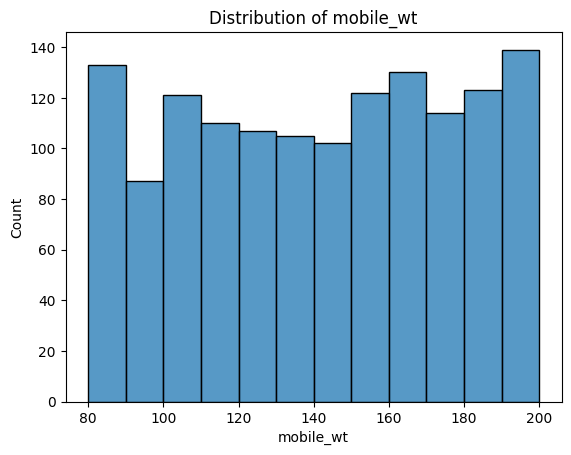

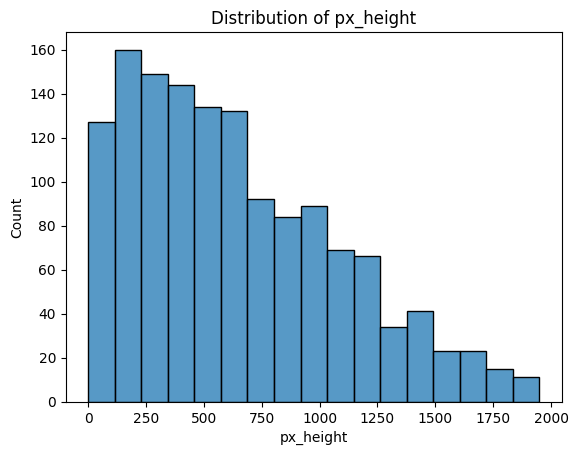

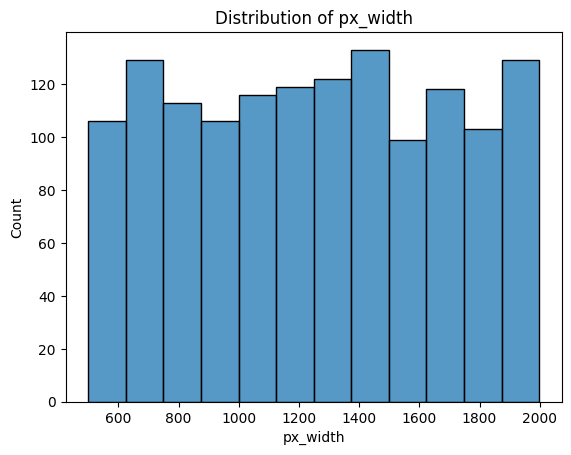

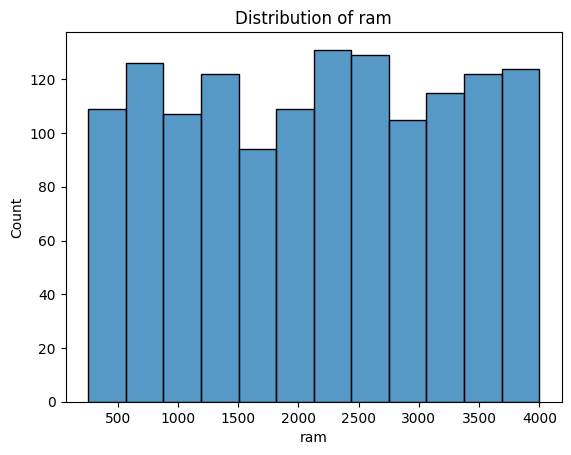

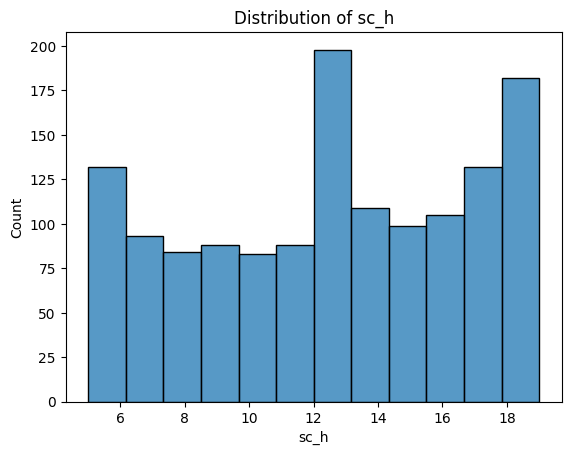

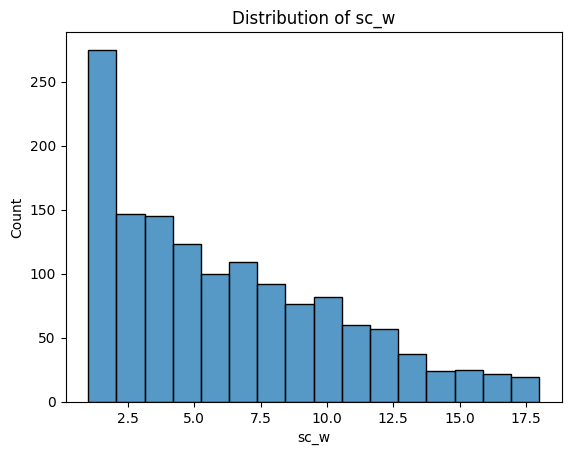

In [ ]:
for i in ['battery_power','clock_speed','fc','pc','int_memory','m_dep','mobile_wt','px_height','px_width','ram','sc_h','sc_w']:
  sns.histplot(data=train_df, x=i)
  plt.title(f'Distribution of {i}')
  plt.show()

We can see that the distribution of data is very normal even when there is skew.
for example, in sc_w (Screen Width of mobile in cm) the plot is skewed to the right. and its normal becaues mobile are often goes vertical not horizontal

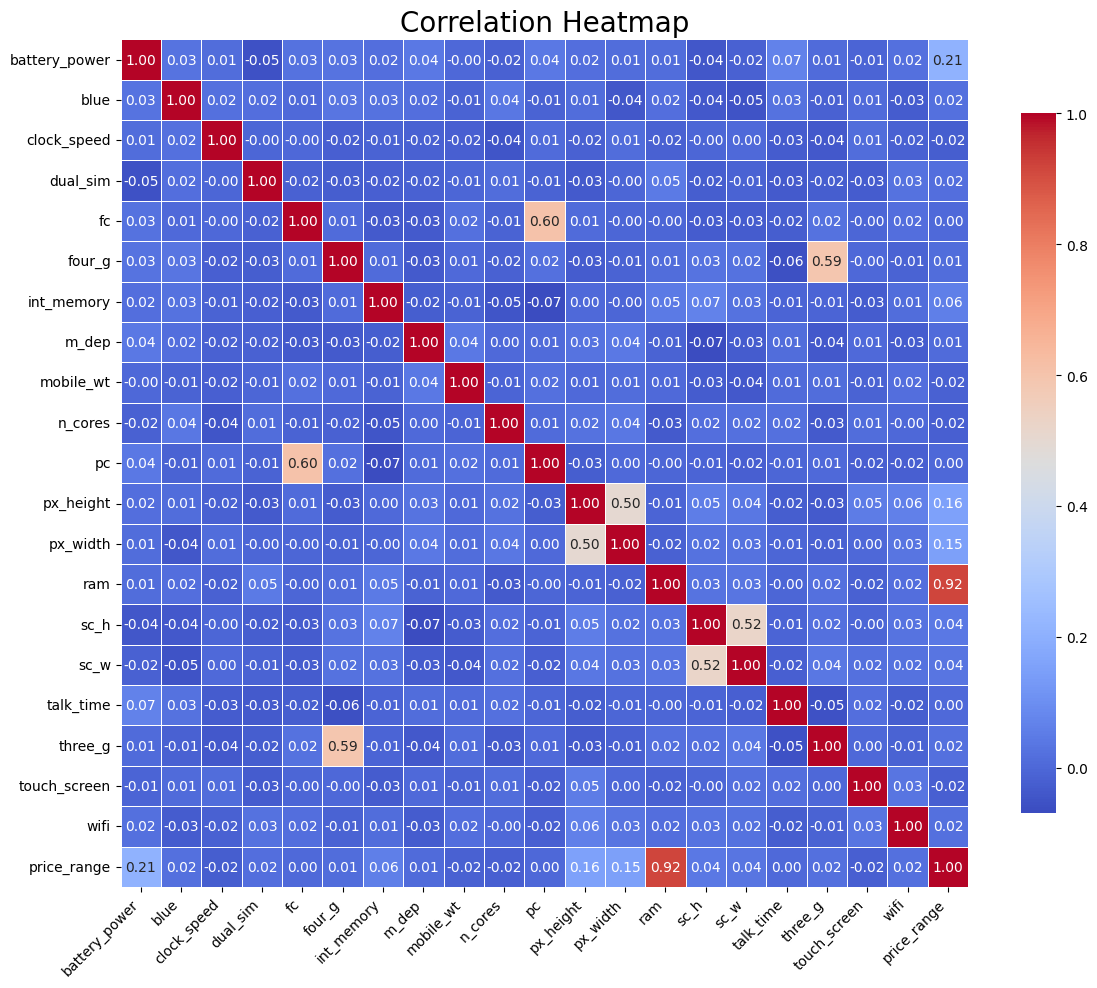

In [ ]:
correlation_matrix = train_df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            square=True,
            cbar_kws={"shrink": .8},
            linewidths=.5,
            linecolor='white')

# Set titles and labels
plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Model Building**

From the correlation map we can see that not every feature is important for the traget (price_range).
We have to eliminate columns with correlation >= 2% :

blue, clock_speed, dual_sim, fc, four_g, m_dep, mobile_wt,
 n_cores, pc, talk_time, three_g, touch_screen, wifi

## **Selecting X and Y**

In [ ]:
X = train_df.drop(columns=['blue','clock_speed','dual_sim','fc','four_g','m_dep','mobile_wt','n_cores','pc',
                           'talk_time','three_g','touch_screen','wifi','price_range'],axis=1)
y = train_df['price_range']

In [ ]:
X.head()

,battery_power,int_memory,px_height,px_width,ram,sc_h,sc_w
0,842,7.0,20.0,756.0,2549.0,9.0,7.0
2,563,41.0,1263.0,1716.0,2603.0,11.0,2.0
4,1821,44.0,1208.0,1212.0,1411.0,8.0,2.0
5,1859,22.0,1004.0,1654.0,1067.0,17.0,1.0
6,1821,10.0,381.0,1018.0,3220.0,13.0,8.0


## **Spliting and scaling data**

We need to scale data to be all in one scale [Between 0 and 1].
But we do this after splitting data into train and test to prevent data leakage.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
scaled_X_train = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_normalized = scaler.transform(X_test)
scaled_X_test = pd.DataFrame(X_test_normalized, columns=X_test.columns)

## **Model training**

Now we will try 4 classfication algorithms
* Support Victor Machine (SVM)
* KNeighborsClassifier
* DecisionTreeClassifier
* Random Forest

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, r2_score

svm_model = SVC()
svm_model.fit(scaled_X_train, y_train)
svm_predictions = svm_model.predict(scaled_X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Support Vector Machine Accuracy:", svm_accuracy)

Support Vector Machine Accuracy: 0.8939828080229226


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(scaled_X_train, y_train)
knn_predictions = knn_model.predict(scaled_X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("k-Nearest Neighbors (KNN) Accuracy:", knn_accuracy)

k-Nearest Neighbors (KNN) Accuracy: 0.7249283667621776


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(scaled_X_train, y_train)
dt_predictions = dt_model.predict(scaled_X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.830945558739255


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score

rf_model = RandomForestClassifier()
rf_model.fit(scaled_X_train, y_train)
rf_predictions = rf_model.predict(scaled_X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest (RF) Accuracy:", rf_accuracy)

Random Forest (RF) Accuracy: 0.8653295128939829


The best accuracy was achieved with both SVM and Random Forest models. However, we will choose Random Forest because it is more effective at capturing complex relationships between features and targets. Additionally, Random Forest is less prone to overfitting due to its ensemble nature, which combines multiple decision trees to improve generalization.



## **Model optimizing and fine-tunning**

We will optimize the model and fine-tune its parameters using the GridSearchCV algorithm. This approach allows us to identify the best parameters for our data, ensuring optimal training and performance.



In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
              'criterion': ['gini', 'entropy','log_loss'],
              'max_depth': [None, 3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(scaled_X_train, y_train)
grid_best_params = grid_search.best_params_
print("Grid Search Best Parameters:", grid_best_params)

Grid Search Best Parameters: {'criterion': 'log_loss', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


The optimal parameters identified are {'criterion': 'log_loss', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}. We will retrain the model using these parameters to enhance its performance.

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(criterion='log_loss',max_depth=None, min_samples_leaf = 1, min_samples_split = 2)

rf.fit(scaled_X_train, y_train)

# Make predictions
y_pred = rf.predict(scaled_X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print('\n-------------------------------\n')
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Mean Absolute Error (MAE): 0.10888252148997135
Mean Squared Error (MSE): 0.10888252148997135

-------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        92
           1       0.85      0.91      0.88        76
           2       0.88      0.80      0.84        96
           3       0.87      0.92      0.89        85

    accuracy                           0.89       349
   macro avg       0.89      0.89      0.89       349
weighted avg       0.89      0.89      0.89       349



Confusion Matrix:


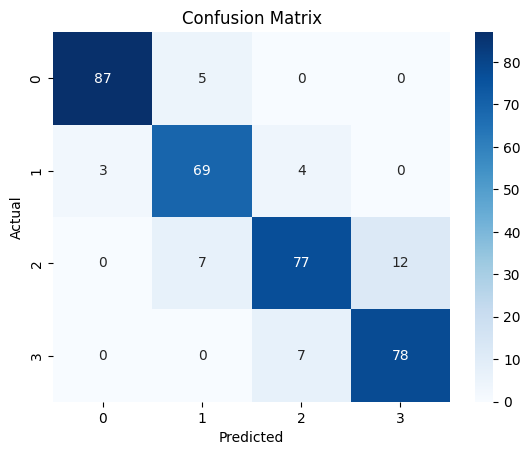

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The model demonstrates strong performance across all four classes. Based on the 349 validation samples, we observe the following:

* Low Cost (Class 0): 87 of 90 samples were correctly classified, with 3 misclassified as Medium Cost.
* Medium Cost (Class 1): 69 of 81 samples were accurately classified. 5 were misclassified as Low Cost, and 7 as High Cost.
* High Cost (Class 2): 77 of 88 samples were correctly classified. 4 were misclassified as Medium Cost, and 7 as Very High Cost.
* Very High Cost (Class 3): 78 of 90 samples were accurately classified, with 12 misclassified as High Cost."

# **Saving Model**

In [3]:
import pickle

rf = RandomForestClassifier(criterion='log_loss',max_depth = None,
                            min_samples_leaf = 1, min_samples_split = 2)
model = rf.fit(X, y)

filename = 'rfmodel.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

# **Model Testing**

Testing the model and predicting 10 samplest from test dataset

In [4]:
import pickle

with open('/content/rfmodel.pkl', 'rb') as file:
    model = pickle.load(file)
# print(test_df.iloc[0])
for i in range(10):
   X_test = test_df.iloc[[i]][['battery_power','int_memory',
                       'px_height','px_width','ram','sc_h','sc_w']]
   y_pred = model.predict(X_test)
   if y_pred == 0:
    result = 'low cost'
   elif y_pred == 1:
    result = 'medium cost'
   elif y_pred == 2:
    result = 'high cost'
   else:
    result = 'very high cost'
   print(f'{i} sample prediction: {result}')

0 sample prediction: very high cost
1 sample prediction: very high cost
2 sample prediction: very high cost
3 sample prediction: very high cost
4 sample prediction: medium cost
5 sample prediction: very high cost
6 sample prediction: very high cost
7 sample prediction: medium cost
8 sample prediction: very high cost
9 sample prediction: low cost
